# Student Performance Indicator

Life cycle of a Machine Learning Project

1) Understanding the Problem Statement
2) Data Collection
3) Data Checks to Perform
4) Exploratory Data Analysis
5) Data Pre-Processing
6) Model Training
7) Choose the Best Model

### 1) Problem Statement

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental Level of Education, Lunch and Test Preparation Course.

### 2) Data Collection

The Data Consists of 8 columns and 1000 rows.

### 2.1) Import Data and Required Packages

importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [1]:
## Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the csv Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the Dataset

In [4]:
df.shape

(1000, 8)

### 2.2) Dataset Information

1) gender: sex of students -> (Male/Female)
2) race/ethnicity: ethnicity of Students -> (Group A,B,C,D,E)
3) parental level of education: parents final education -> (bachelor's degree,some college, master's degree, associate's degree, high school)
4) lunch: having lunch before test( standard or free/reduced)
5) test preparation couse: complete or not complete before test
6) math score
7) reading score
8) writing score5

### 3.1) Check Missing Values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values

### 3.2) Check Duplicates

In [6]:
df.duplicated().sum()

0

There are no duplicates values in the dataset

### 3.1) Check Data Types

In [7]:
## Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4) Checking the Number of Unique Values of each Column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5) Check Statistics of DataSet

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insights

1) From the above description of numerical data, all means are very close to each other, 66.09, 69.17 and 68.05
2) The lowest score in maths is 0, while the lowest in reading and writing are 17 and 10.
3) Students scored the highest score of 100 in each subject.
4) All Standard Deviations are close: 15.16, 14.6, and 15.19

### 3.7) Exploring Data

In [13]:
print("Categories in 'gender' variable:   ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ", end=" ")
print(df["race_ethnicity"].unique())

print("Categories in 'parantal_level_of_eduction' variable: ", end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable: ", end=" ")
print(df['test_preparation_course'].unique())


Categories in 'gender' variable:    ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parantal_level_of_eduction' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:  ['none' 'completed']


In [16]:
## define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features),categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8) Adding Columns For "Total Score" and "Average"

In [17]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [18]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [19]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#### Insights

1) From the above we can see that more students performed badly in Maths
2) The best performance is in Reading

### 4)  Exploring Data Using Visualisation

#### 4.1) Visualise Average score distribution 

. Histogram
. Kernel Distribution Function (KDE)

#### 4.1.1) Histrogram & KDE

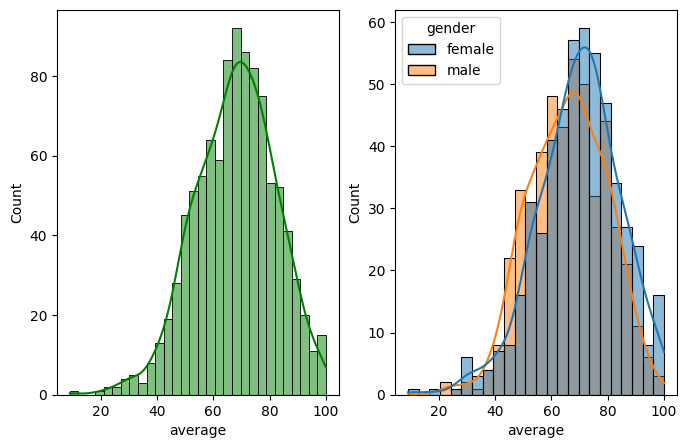

In [22]:
fig, axs = plt.subplots(1,2, figsize=(8,5))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

The females out performed the males.